In [76]:
# download the csv file and the dash template

# import wget
# wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
# wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py")

In [24]:
# First, prepare the code generating appropriate plots
import pandas as pd
import plotly.express as px

spacex_df = pd.read_csv('spacex_launch_dash.csv')
display(spacex_df.head())
display(spacex_df.info())
print(pd.unique(spacex_df['Launch Site']))

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56 non-null     int64  
 1   Flight Number             56 non-null     int64  
 2   Launch Site               56 non-null     object 
 3   class                     56 non-null     int64  
 4   Payload Mass (kg)         56 non-null     float64
 5   Booster Version           56 non-null     object 
 6   Booster Version Category  56 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ KB


None

['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40']


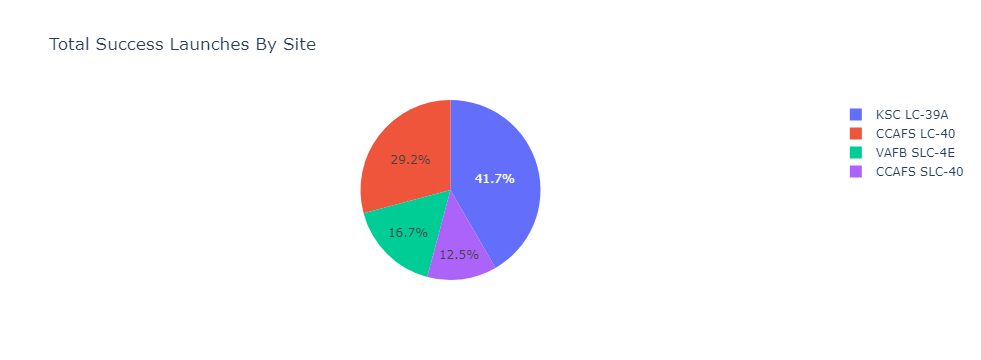

In [89]:
# Here, ceeate the success pie chart

# Pie chart for all launches
fig = px.pie(spacex_df, values = 'class', names = 'Launch Site', title = 'Total Success Launches By Site')
fig.show()

# Pie chart for a given site
sites = ['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']
site = sites[1]
site_df = spacex_df[spacex_df['Launch Site'] == site]
fig = px.pie(site_df, names = 'class', title = f'Total Success Launches for site {site}')
# fig.show()

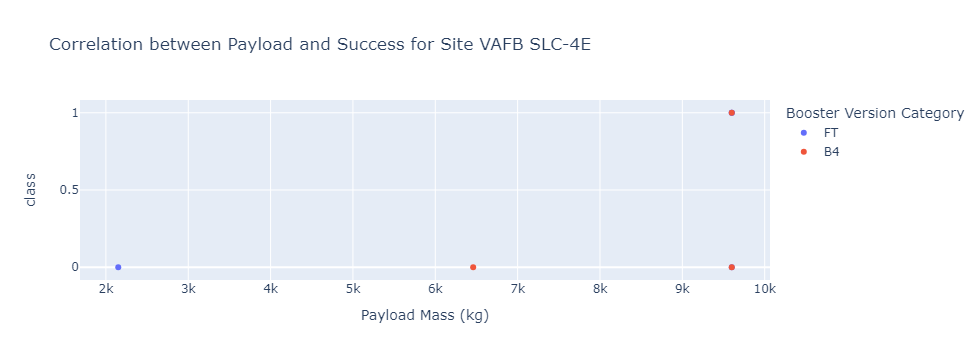

In [81]:
# Here, we create the scatter plot for different values of payload from 0kg to 10000kg

start = 1000
end = 10000

# Scatter plot if all sites are selected
filtered_mass_df = spacex_df[(spacex_df['Payload Mass (kg)'] > start) & (spacex_df['Payload Mass (kg)'] < end)]
fig = px.scatter(filtered_mass_df, x = 'Payload Mass (kg)', y = 'class', color = 'Booster Version Category', title = 'Correlation between Payload and Success for all Sites')
# fig.show()

# Scatter plot if only one site is selected
filtered_mass_df = spacex_df[(spacex_df['Payload Mass (kg)'] > start) & (spacex_df['Payload Mass (kg)'] < end) & (spacex_df['Launch Site'] == site)]
fig = px.scatter(filtered_mass_df, x = 'Payload Mass (kg)', y = 'class', color = 'Booster Version Category', title = f'Correlation between Payload and Success for Site {site}')
fig.show()